# HSV color space
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_02a_basic_image_processing/hsv.ipynb)



In [1]:
# to run in google colab
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/grass.jpg'.split())



In [2]:
# Adopted from: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

figsize = (10, 10)



Read basic image:



Text(0.5, 1.0, 'original image')

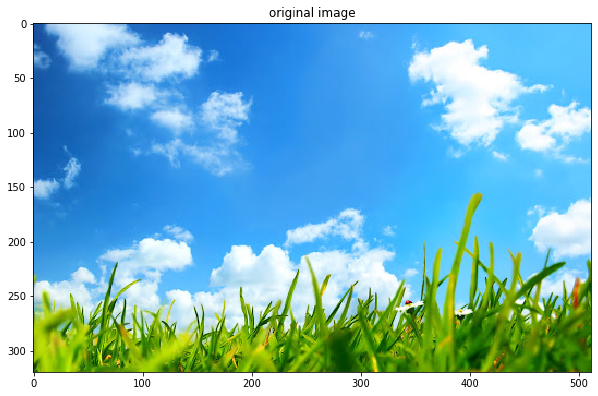

In [3]:
bgr_im = cv2.imread("grass.jpg")
rgb_im = cv2.cvtColor(bgr_im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=figsize)
plt.imshow(rgb_im)
plt.title("original image")


We want to separate the grass from the sky. we'll do this by masking all pixels in the image that are not green.

First, find HSV green



In [4]:
rgb_green = np.uint8([[[0, 255, 0]]])  # 3d array just because this is what cvtColor expects...
hsv_green = cv2.cvtColor(rgb_green, cv2.COLOR_RGB2HSV)[0, 0, :]
print(hsv_green)



[ 60 255 255]


Second, convert the image to HSV and threshold only the green color and neighborhood.

We will take hue TH of +30 and -70 (because it's farther from blue- the sky).
Let's take all saturation and value variants of green in the TH.

Masking all that is in the TH should give us only the grass


Text(0.5, 1.0, 'Thresholding schematics')

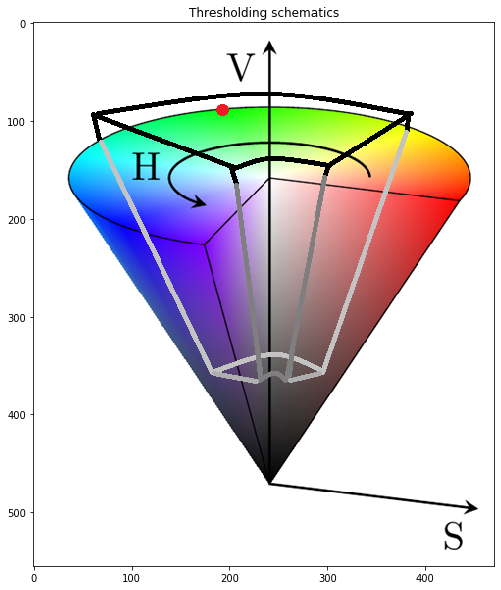

In [5]:
thresholding_schematics = cv2.cvtColor(cv2.imread("hsv_th.png"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=figsize)
plt.imshow(thresholding_schematics)
plt.title("Thresholding schematics")


Text(0.5, 1.0, 'resulted mask')

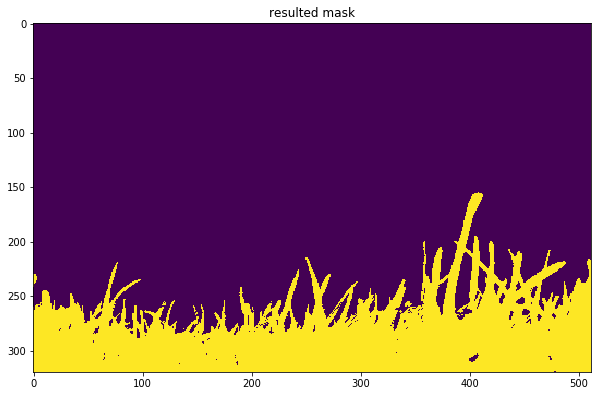

In [6]:
# Convert BGR to HSV
hsv_im = cv2.cvtColor(rgb_im, cv2.COLOR_RGB2HSV)

# define range of hue and intensity
lower_th = hsv_green-np.array([70, 200, 200])
upper_th = hsv_green+np.array([30, 0, 0])

# Threshold the HSV image
mask = cv2.inRange(hsv_im, lower_th, upper_th)

plt.figure(figsize=figsize)
plt.imshow(mask)
plt.title("resulted mask")



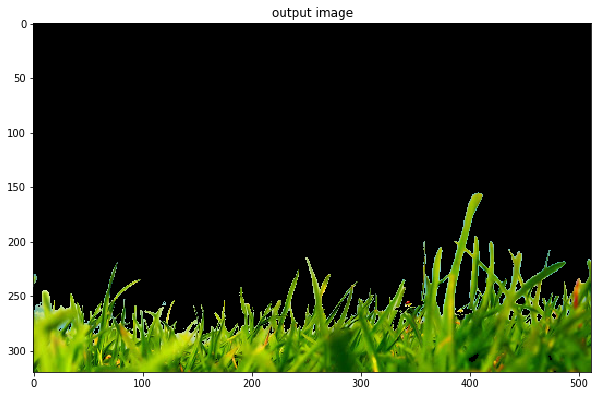

In [7]:
# Trick: apply 2d mask on 3d image
rgb_res = cv2.bitwise_and(rgb_im, rgb_im, mask=mask)

plt.figure(figsize=figsize)
plt.imshow(rgb_res)
plt.title("output image")
plt.show()
